### Customer Segmentation Analysis


In [1]:
import numpy as np     
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

#### Reading data

In [2]:
df = pd.read_csv(r"C:\\Users\\aansh\\OneDrive\\Desktop\\Customer-Segmentation-Analysis-main\Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.describe

<bound method NDFrame.describe of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
df = df.rename(columns={'Genre': 'Gender','Annual Income (k$)': 'Annual_income', 'Spending Score (1-100)': 'Spending_score'})

In [6]:
df.head()

,CustomerID,Gender,Age,Annual_income,Spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Checking for any null values 

In [7]:
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual_income     0
Spending_score    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_income   200 non-null    int64 
 4   Spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### Since Gender is not a numerical value but an object type variable, we are going to replace the row values as Female being 0 and Male being 1.

In [9]:
df['Gender'].replace(['Female','Male'], [0,1],inplace=True)

In [10]:
df['Gender']


0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

## Data Visualization

It's important to visualize data because it helps us draw better insights from the data that we working on. Note that I will use the gender to seperate data for easy differentiable values for both men and women.

### Exploratory Data Analysis

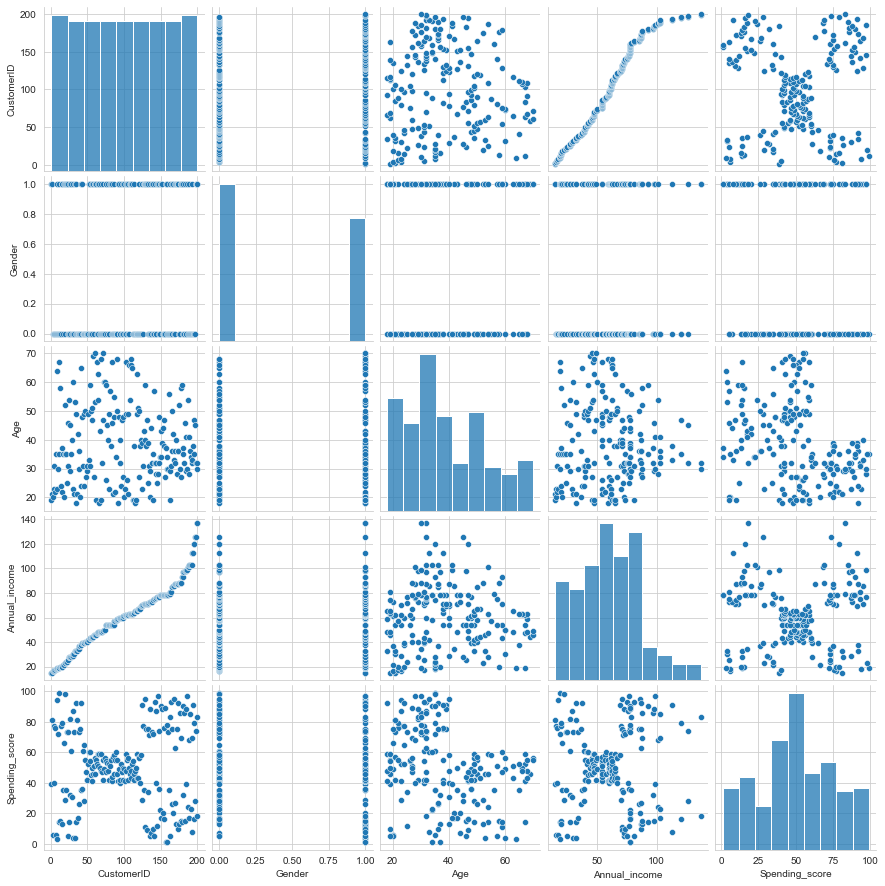

In [11]:
sns.set_style('whitegrid')
sns.pairplot(df, palette="husl")

#### Density Estimation of Values, namely Annual Income, Spending Score and Age

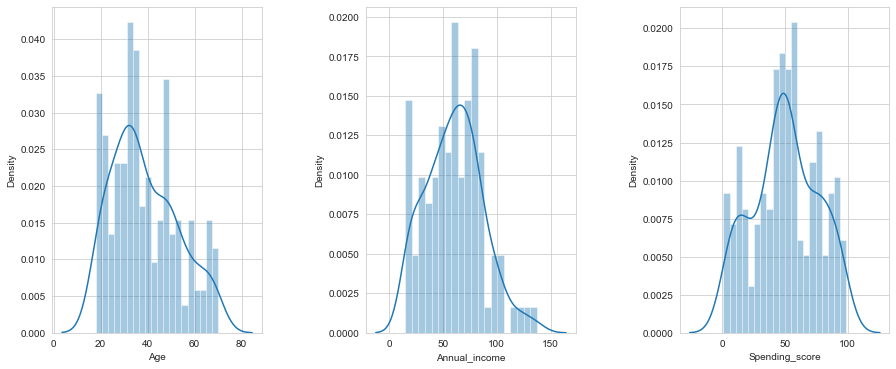

In [12]:
plt.figure(1,figsize=(15 , 6))
feature_list = ['Age','Annual_income', "Spending_score"]
pos = 1 
for i in feature_list:
    plt.subplot(1 , 3 , pos)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.distplot(df[i], bins=20, kde = True)
    pos = pos + 1
plt.show()

In these histograms we can observe that the values are distributed such that they resemble a Gaussian Distribution, where the vast majority of the values lay in the middle with some exceptions in the extremes.Now that we have our plot, let us plot the relation between the different variables using gender as a class distinction.

0    112
1     88
Name: Gender, dtype: int64

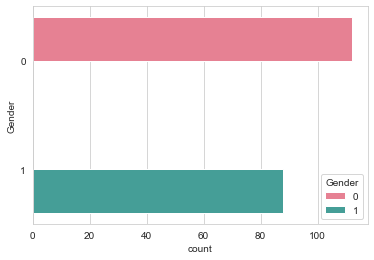

In [13]:
sns.countplot(y = 'Gender', data = df, palette="husl", hue = "Gender")
df["Gender"].value_counts()

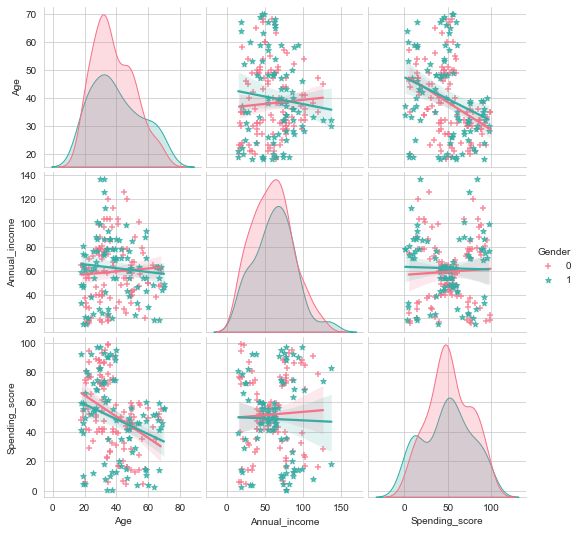

In [14]:
sns.pairplot(df, vars=["Age", "Annual_income", "Spending_score"],  kind ="reg", hue = "Gender", palette="husl", markers = ['+','*'])

In this pairplot we can clearly observe that the relation between the different variables we have in our dataset. Now, a point that is to be taken into importance is that at the diagonal of this pairplot, we can see the same graphical distribution as we have studied before, but this time we have gender as the parameter to segregate. For each value of each variable that is plotted above, we see that in the proportion between men and women, as is represented by the pink and teal colours, women are in a higher ratio than men.

### Let's visualize some important comparisons

#### Age v/s  Annual Income

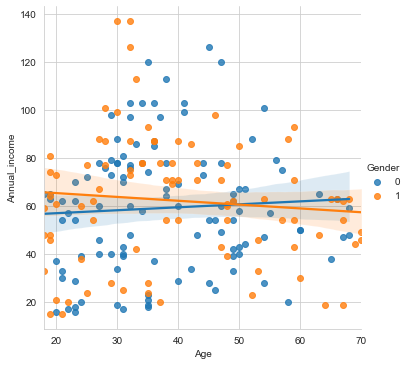

In [15]:
sns.lmplot(x = "Age", y = "Annual_income", data = df, hue = "Gender")

In this graphic we can clearly see how people in their thirties, forties and fifthies tend to earn more on an annual basis than the ones who are either below their thirties or older than fifties. We can say that people whose age is between thirty to fifty years old seem to get better jobs than the others, the reason might be since they are more experienced than the youngsters or the elders. In the graph, we can also see that the annual income of males is comparitively higher than females.

#### Spending Score v/s Annual Income

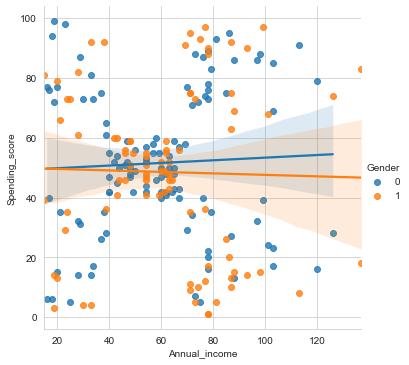

In [16]:
sns.lmplot(x = "Annual_income", y = "Spending_score", data = df, hue = "Gender")

Here we can observe how a better annual income leads to having a higher spending score, especially for women. However the correlation between these two variables isn't too big. Majority of the people lie in the middle of the graph which means that they have decent salaries and a reasonably high spending score.

#### Age v/s Spending Score

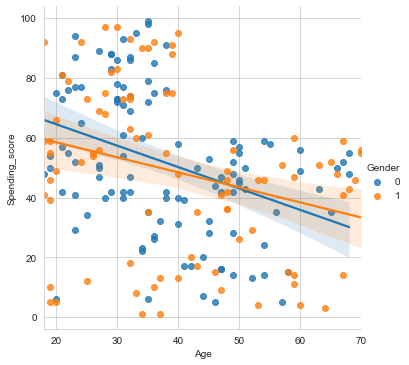

In [17]:
sns.lmplot(x = "Age", y = "Spending_score", data = df, hue = "Gender")

In this graph, we can see something that was quite predictable. Young people tend to spend way more than older people. Many reasons play their role here.

## Clustering

#### In order to divide the data into the optimal number of clusters, we will use the Elbow Method.

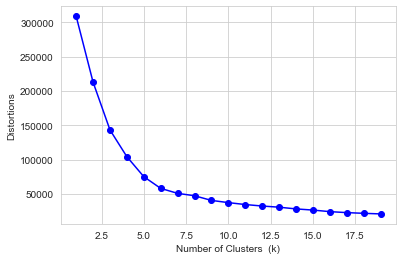

In [18]:
X = df.loc[:,["Age", "Annual_income", "Spending_score"]]
distortions = []
k = range(1,20)
for i in k:
    k_means_model = KMeans(n_clusters=i, random_state=0)
    k_means_model.fit(X)
    distortions.append(k_means_model.inertia_)
plt.plot(k , distortions , 'bo-')
plt.xlabel('Number of Clusters  (k)') , plt.ylabel('Distortions')
plt.show() 

The elbow method is used to determine the optimal number of clusters in K-Means Clustering. The elbow method plots the value of the cost function produced by different values of k. By looking at the graph, selecting 5 as the number of clusters would be the best choice to divide our data in.

In [19]:
k_means_model = KMeans(n_clusters=5,random_state=0)
k_means_model.fit(df)

KMeans(n_clusters=5, random_state=0)

In [20]:
labels = k_means_model.labels_

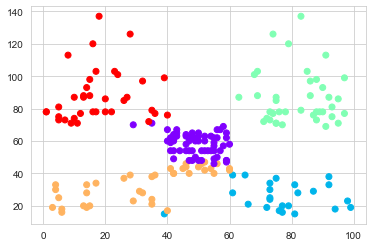

In [21]:
plt.scatter(df['Spending_score'],df['Annual_income'], c=k_means_model.labels_,cmap='rainbow')

We can see that 5 clusters are distinct when taking Spending Score and Annual Income into account.


#### We will also visualize the 5 clusters analysis on the 3-D plane for better understanding.¶

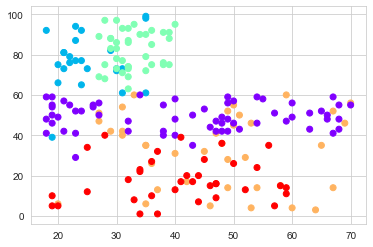

In [23]:
plt.scatter(df['Age'],df['Spending_score'], c=k_means_model.labels_,cmap='rainbow')

We can see that 5 clusters are not distinct when taking Spending Score and Age into account. Hence we need to find the optimal number of clusters again keeping in mind the desired data.


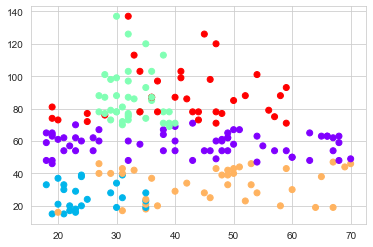

In [24]:
plt.scatter(df['Age'],df['Annual_income'], c=k_means_model.labels_,cmap='rainbow')

Here too we can see that 5 clusters are not distinct when taking Age and Annual Income into account. Hence we need to find the optimal number of clusters again keeping in mind the desired data.

#### Age and Spending Score Clusters

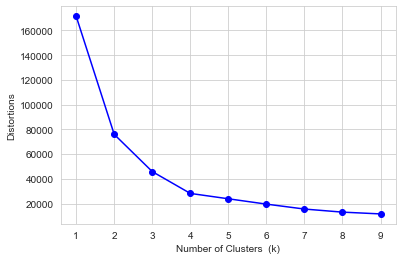

In [25]:
Y = df.loc[:,['Age', 'Spending_score']]
distortions = []
k = range(1,10)
for i in k:
    k_means_model = KMeans(n_clusters = i)
    k_means_model.fit(Y)
    distortions.append(k_means_model.inertia_)
plt.plot(k , distortions , 'bo-')
plt.xlabel('Number of Clusters  (k)') , plt.ylabel('Distortions')
plt.show() 

We will choose 4 clusters.

In [26]:
k_means_model = KMeans(n_clusters=4)
k_means_model.fit(Y)

KMeans(n_clusters=4)

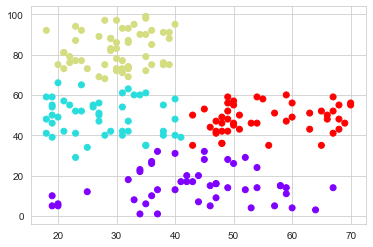

In [27]:
plt.scatter(df['Age'],df['Spending_score'], c=k_means_model.labels_,cmap='rainbow')

We can see that 4 clusters are distinct when taking Age and Spending Score into account.

#### Age and Annual Income Clusters

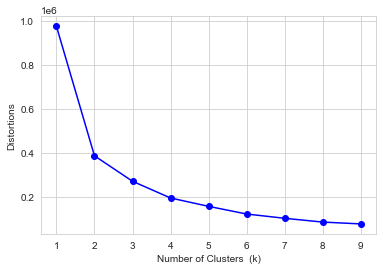

In [28]:
distortions = []
Z = df.loc[:,['Age', 'Annual_income']]
k = range(1,10)
for i in k:
    k_means_model = KMeans(n_clusters = i)
    k_means_model.fit(df)
    distortions.append(k_means_model.inertia_)
plt.plot(k , distortions , 'bo-')
plt.xlabel('Number of Clusters  (k)') , plt.ylabel('Distortions')
plt.show()

We will choose 6 clusters as clusters less than 5 would give us a bad fit.

In [29]:
k_means_model = KMeans(n_clusters=6)
k_means_model.fit(Z)

KMeans(n_clusters=6)

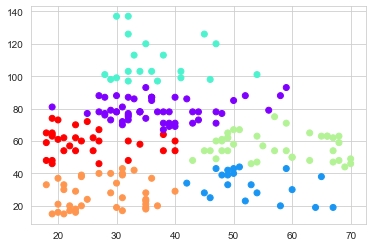

In [30]:
plt.scatter(df['Age'],df['Annual_income'], c=k_means_model.labels_,cmap='rainbow')

We can see that 6 clusters are distinct when taking Age and Annual Income into account.

## Conclusions and Insights

1) There isn't much difference between the spending scores of women and men.


2) Observing the clustering graphs, it can be clearly observed that young people spend more money in malls than any of others.

3) K Means Clustering is a powerful algorithm for decent customer segmentation analysis.

### Thank you
Customer Segmentation Analysis Project by
Anshul Srivastava